In [1]:
pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=0582cd62098b717be7a146fa70e31a3b5933ae848b782324f32b042d5e3b1cda
  Stored in directory: c:\users\yadav\appdata\local\pip\cache\wheels\e7\3f\19\97faa9b38eab58ba402cb09bf5a7adb689fffa71612c4b042f
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [105]:
from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route("/getdata", methods = ["GET", "POST"])
def get_data():
    
    result = {}
    
    print(request.json)
    data = request.json

    result["Revenues"] = (data["Common Expension"][" HOA Common Expenses Dues "] * data["Common Expension"]["Number of Units"]) * 12
    
    result["Minus_Delinquent"] = result["Revenues"] * .02
    result["Gross_Profit"] = result["Revenues"] - result["Minus_Delinquent"] 
    print("\nRevenues:- {}, \nMinus_Delinquent:- {}, \nGross_Profit:- {}".format(result["Revenues"], result["Minus_Delinquent"], result["Gross_Profit"]))

    result["Common_Expenses_subtotal"] = sum(data["Common Expenses (Year)"].values())
    
    print("\nCommon_Expenses_subtotal:- {}".format(result["Common_Expenses_subtotal"]))

    result["Common_Expenses_NET_Profit_Loss"] = result["Gross_Profit"] - result["Common_Expenses_subtotal"]
    print("Common_Expenses_NET_Profit_Loss:- {}".format(result["Common_Expenses_NET_Profit_Loss"]))

    result["Reserve_Account_Expenses"] = sum(data['REPLACEMENT RESERVES (Replacement between 13 months and 30 years time, as well as exterior painting)'].values())
    
    result["Income_from_Reserve_Dues"] = (data['Replacement Reserves']['HOA Replacement Reserve Dues']* data["Common Expension"]["Number of Units"]) * 12
    print(f'\nReserve_Account_Expenses:- {result["Reserve_Account_Expenses"]}, \nIncome_from_Reserve_Dues:- {result["Income_from_Reserve_Dues"]}')

    result["Reserves"] = 14560 - result["Income_from_Reserve_Dues"] - result["Reserve_Account_Expenses"]
    print("\nReserves:- {}".format(result["Reserves"]))

    result["MY_Total_MONTHLY_Dues"] = sum(data["Total Dues"].values())
    print(f'\nMY_Total_MONTHLY_Dues:- {result["MY_Total_MONTHLY_Dues"]}')

    return result 

if __name__ == '__main__':
    app.run(debug = True)




# {
#     "Common Expension":
#         {
#             " HOA Common Expenses Dues ":174,
#             "Number of Units": 8
#         }
#     ,
#     "Common Expenses (Year)": 
#         {
#             "Bank fees": 45,
#             "Contractor Repairs": 1920,
#             "In-house Maintenance": 500
#         },
#     "Replacement Reserves": {
#         "HOA Replacement Reserve Dues": 30
#     },
#     "REPLACEMENT RESERVES (Replacement between 13 months and 30 years time, as well as exterior painting)":{
#         "Paint the Metal Fence & Gates": 1750,
#         "Update 3 south facing doors": 1200,
#         "roof": 0
#     },
#     "Total Dues":{
#         "HOA Common Expenses Dues": 174,
#         "HOA Replacement Reserve Dues": 30
#     }
# }

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\yadav\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [30]:
from fpdf import FPDF

m = 22   #Margin
pw = 210 - 2*m    #page width: width of A4 is 210mm
ch = 10   #cell height

pdf = FPDF()
pdf.l_margin = m
pdf.r_margin = m
pdf.add_page()
pdf.set_font("Arial", "B", 18)

def table_data(data, heading, d):
    pdf.set_font("Arial", "B", 12)
    pdf.set_text_color(255,255,255)
    pdf.set_fill_color(0, 51, 102)
    pdf.set_top_margin(10)
    pdf.cell(w = 0, h= 10, txt = heading, ln = 1, fill = True)

    epw = pdf.w - 2*pdf.l_margin
    col_width = epw/d
    th = pdf.font_size
    pdf.set_font("Arial","", 10)
    pdf.set_text_color(0,0,0)

    for row in data:
        for data_1 in row:
            pdf.cell( col_width, 10, str(data_1))
        pdf.ln(8)
    return "Done"


pdf.image("Image.png", x = 160, w = 30, h = 26)

pdf.set_text_color(216,109,2)
pdf.cell(w = 0,h =10, txt="EXECUTIVE SUMMARY", ln=1)
pdf.ln(8)

# PROPERTY SUMMARY
data = (
    ("ASSOCIATION NAME", "Sample Condominium Association"),
    ("LOCATION", "Seattle, WA98104"),
    ("YEAR CONSTRUCTED", 2015),
    ("NUMBER OF UNITS", 100),
    ("FINANCIAL YEAR", "2017(Januart 1, 2017 - December 31, 2017"),
    ("REPORT LEVEL", "Level 1 Full Study with site Visit")
)
table_data(data, "PROPERTY SUMMARY", 3)
pdf.ln(8)

# Reserve Fund
data = (
    ("PROJECTED STARTING BALANCE", "$103.613"),
    ("FULL FUNDED BALANCE, IDEAL", "$163.017"),
    ("PERCENT FUNDED", "64%"),
    ("INTEREST EARNED", "1.00%"),
    ("INFLATION RATE", "3.00%"),
)
table_data(data, "RESERVE FUND", 2)
pdf.ln(8)

# RESERVE CONTRIBUTIONS
data = (
    ("CURRENT RESERVE FUND CONTRIBUTION", "$87.753"),
    ("FULL FUNDED MAXIMUM CONTRIBUTION", "$198.866"),
    ("BASELINE FUNDING, MINIMUM CONTRIBUTION", "$100.617"),
    ("SPECIAL ASSESSMENT", "$0"),
)
table_data(data, "RESERVE CONTRIBUTIONS", 2)
pdf.ln(8)

# 2ND Page of PDF
pdf.add_page()
pdf.set_font("Arial", "B", 18)

pdf.image("Image.png", x = 160, w = 30, h = 26)

pdf.set_text_color(216,109,2)
pdf.cell(w = 0,h =10, txt="KEY INSIGHTS", ln=1)
pdf.ln(8)

pdf.set_text_color(0,25,51)
pdf.set_font("Arial", "B", 25)
pdf.cell(w = pw/3, h=10, txt="$103,613", ln=0, align= 'C')
pdf.cell(w = pw/3, h=10, txt="$87,753", ln=0, align="C")
pdf.cell(w = pw/3, h=10, txt="$5,102,536", ln=1, align="C")

pdf.set_text_color(216,109,2)
pdf.set_font("Arial", "B", 10)

pdf.multi_cell(w = pw/3, h = 10, txt= "Reserve Account Balance",align= "C")
pdf.line(pdf.get_y(), 84,pdf.get_y(), 54)
print(pdf.get_x(), pdf.get_y())
pdf.set_xy(pdf.get_x()+pw/3, pdf.get_y()-10)
pdf.multi_cell(w = pw/3, h = 10, txt= "Annual Reserve Contribution", align="C")
print(pdf.get_x(), pdf.get_y())
pdf.line(pdf.get_y()+ pw/3 + 4, 84,pdf.get_y()+pw/3 + 4, 54)
pdf.set_xy(pdf.get_x()+(2*pw/3), pdf.get_y()-10)
pdf.multi_cell(w = pw/3, h = 10, txt= "Projected Exprenses over 30 years",align= "C")
pdf.ln(8)

pdf.image("plot.png", x = 10, w = 150, h = 80)


pdf.line(20, 190,20, 200)     # to create verticle line
pdf.line(120, 200,20, 200)
pdf.line(120, 190,120, 200)
#pdf.line(x1, y1, x2, y2)

# draw a dashed line
# pdf.dashed_line(10, 30, 110, 30, 1, 10)     

pdf.output("example.pdf", "F")

22 74
22 74


''

In [5]:
d = {"w":12, "t":23}

d2 = {"k'":12}

d.update(d2)
d

{'w': 12, 't': 23, "k'": 12}

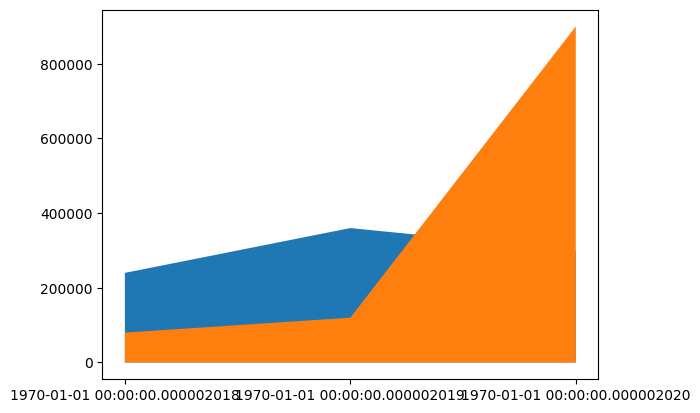

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dfItem = pd.read_csv("data.csv")

# plt.figure(figsize=(50,50))
plt.fill_between(dfItem["Year"], dfItem["temp_graph2"])
plt.fill_between(dfItem["Year"], dfItem["temp_graph1"])
plt.savefig('plot.png',bbox_inches='tight')
plt.show()

In [31]:
df = pd.read_excel("30 yr Anytown Reserve Study (1).xlsx", header = [5])

In [40]:
df.iloc[:,2]

0         NaN
1         NaN
2       174.0
3         8.0
4     16704.0
       ...   
57        NaN
58        NaN
59      174.0
60       30.0
61      204.0
Name: 2018, Length: 62, dtype: float64

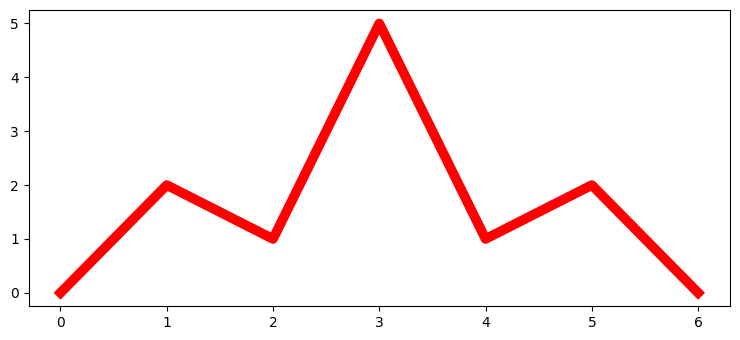

In [21]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

y = [0, 2, 1, 5, 1, 2, 0]

plt.plot(y, color='red', lw=7)

for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)

plt.savefig('plot1.png',bbox_inches='tight')
plt.show()